In [1]:
from pyaw import utils, configs, swarm
import importlib
importlib.reload(utils)
importlib.reload(configs)
importlib.reload(swarm)

<module 'pyaw.swarm' from 'D:\\cleo\\master\\pyaw\\pyaw\\swarm.py'>

In [2]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T000000_20160311T235959_0.pkl"
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T060000_20160311T070000_0.pkl"
start = '20160311T064700'
end = '20160311T064900'

In [3]:
df_e = swarm.pre_e(fp_e,start,end,handle_outliers=False)
df_b = swarm.pre_b(fp_b,start,end,handle_outliers=False)

In [4]:
plotsignal = utils.PlotSignal()

In [5]:
signal = df_e['eh_enu1']

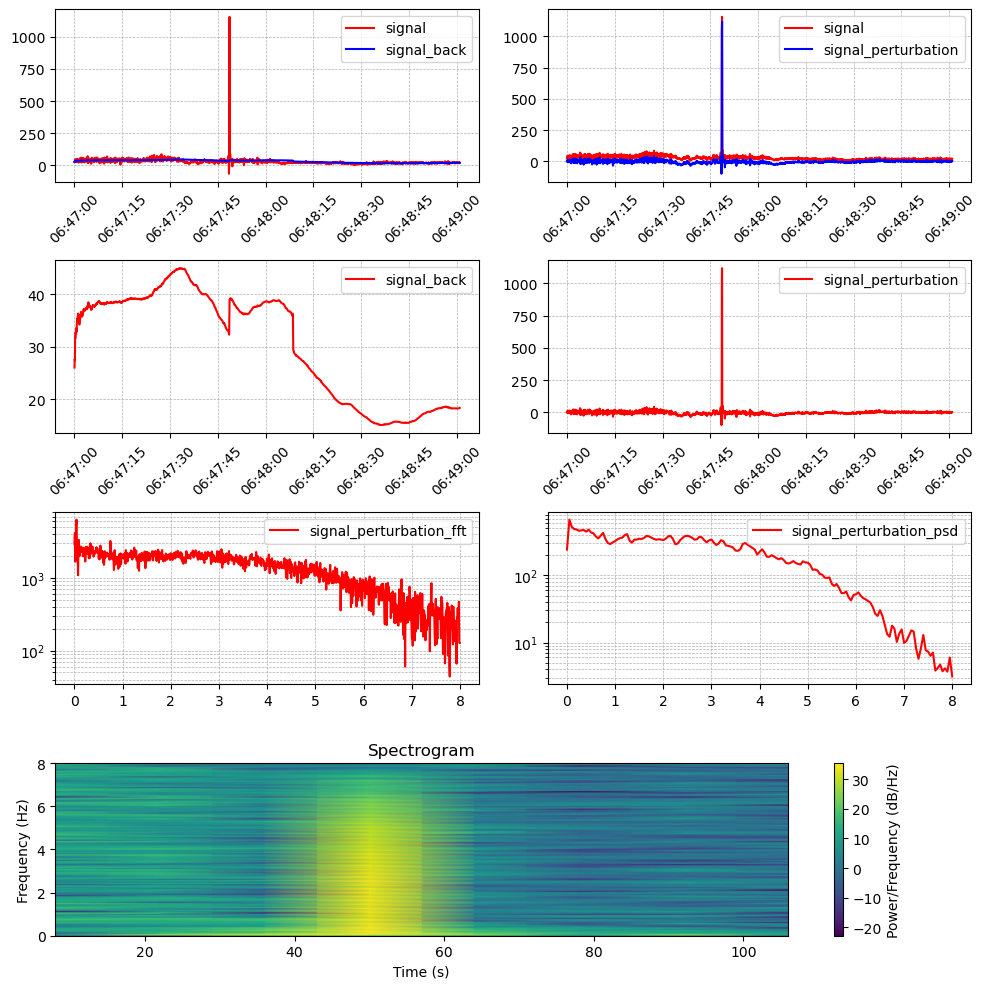

In [6]:
plotsignal.one_signal_ana_inc_spectrogram(signal,window=20*16)

In [7]:
df_e['eh1_enu1'] = df_e['eh_enu1'] - utils.move_average(df_e['eh_enu1'],window=20*16,draw=False)
df_e['eh1_enu2'] = df_e['eh_enu2'] - utils.move_average(df_e['eh_enu2'],window=20*16,draw=False)
df_b['b1_enu1'] = df_b['b_enu1'] - utils.move_average(df_b['b_enu1'],window=20*50,draw=False)
df_b['b1_enu2'] = df_b['b_enu2'] - utils.move_average(df_b['b_enu2'],window=20*50,draw=False)

In [8]:
df_e['timestamp'] = df_e.index.astype('int64')
df_b['timestamp'] = df_b.index.astype('int64')

In [9]:
from scipy.interpolate import interp1d
interp_func1 = interp1d(df_e['timestamp'], df_e['eh1_enu1'], kind='linear', fill_value="extrapolate")
df_b['eh1_enu1_interp'] = interp_func1(df_b['timestamp'])
interp_func2 = interp1d(df_e['timestamp'], df_e['eh1_enu2'], kind='linear', fill_value="extrapolate")
df_b['eh1_enu2_interp'] = interp_func2(df_b['timestamp'])

In [10]:
signal1 = df_b['eh1_enu1_interp']
signal2 = df_b['b1_enu2']

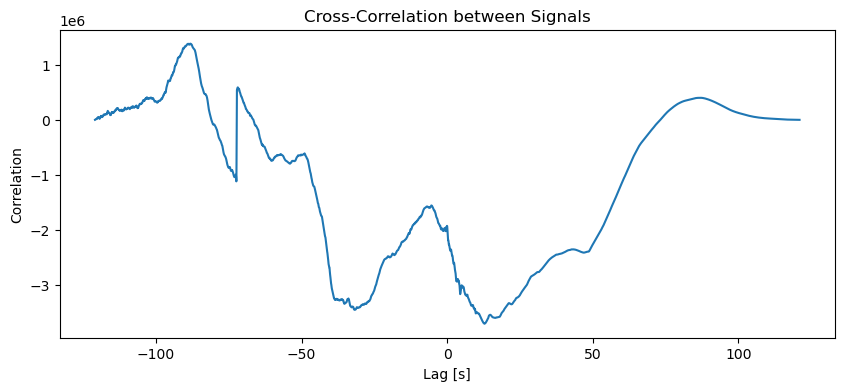

In [11]:
plotsignal.double_signals_cross_correlation(signal1,signal2)

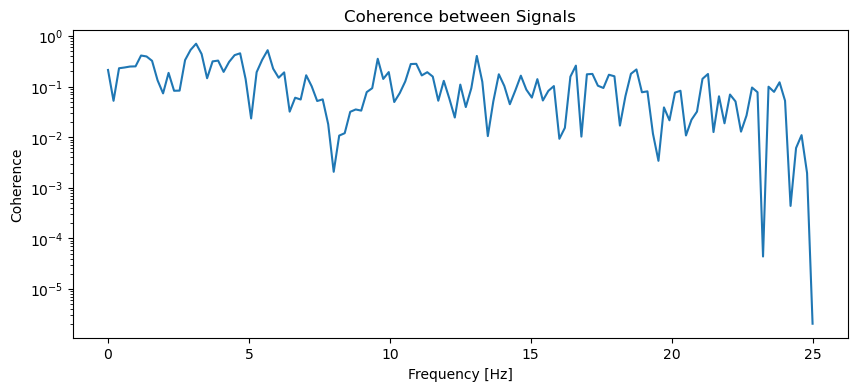

In [12]:
plotsignal.double_signals_coherence(signal1,signal2)

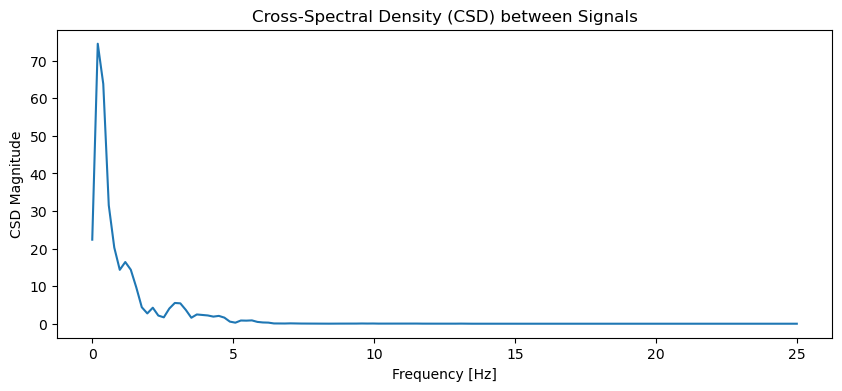

In [13]:
plotsignal.double_signals_csd(signal1,signal2)

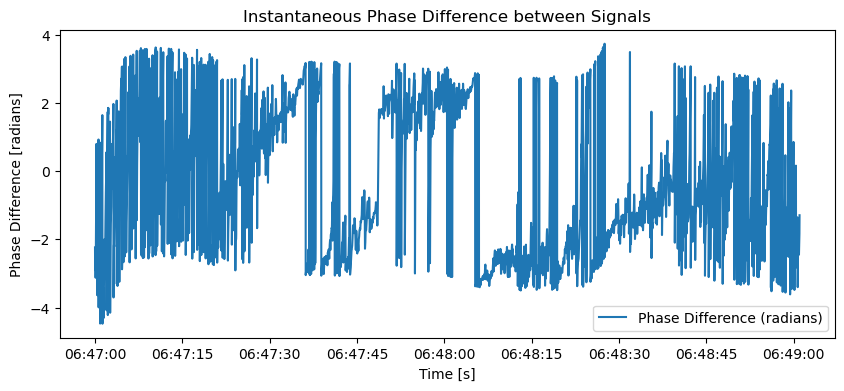

In [14]:
plotsignal.double_signals_hilbert_phase_diff(signal1,signal2)

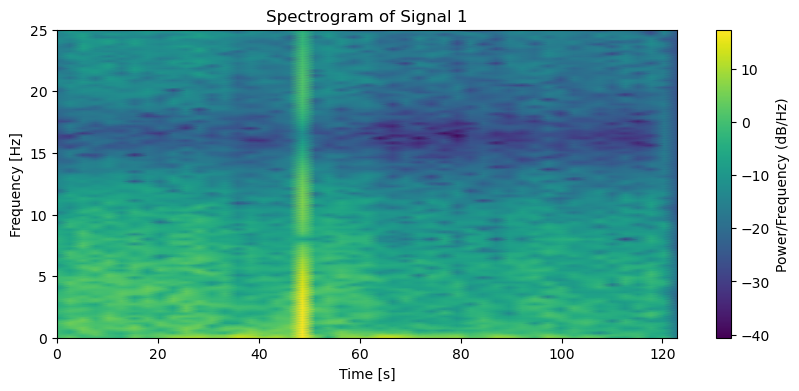

In [15]:
plotsignal.one_signal_stft(signal1,50)

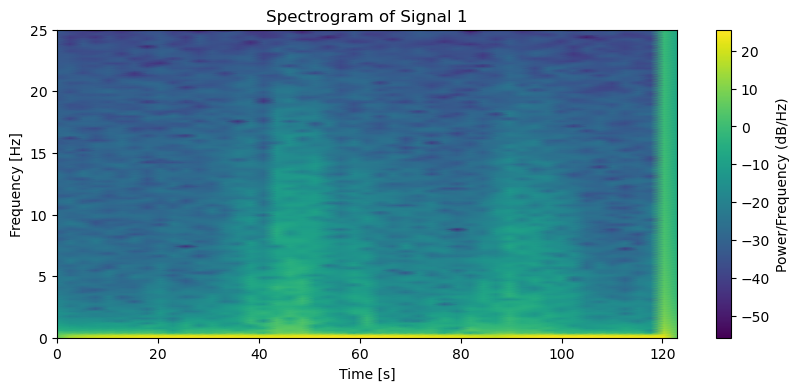

In [16]:
plotsignal.one_signal_stft(signal2,50)

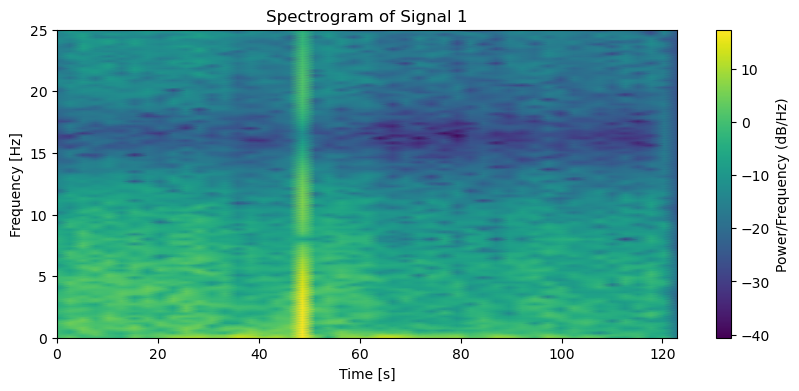

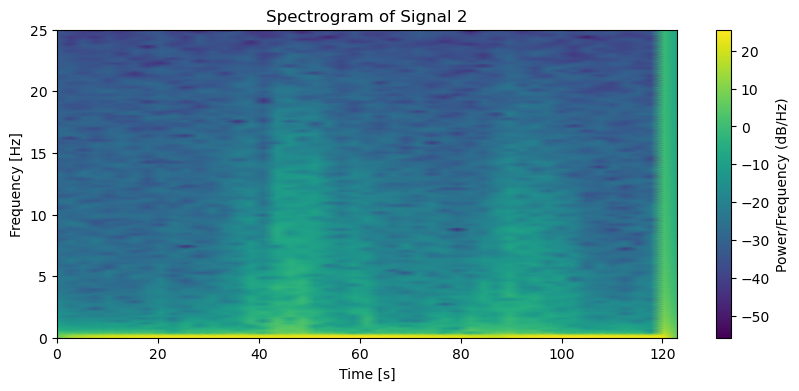

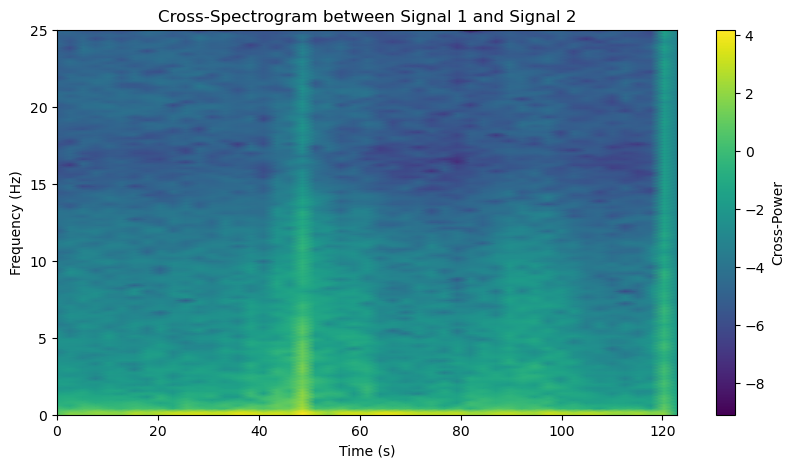

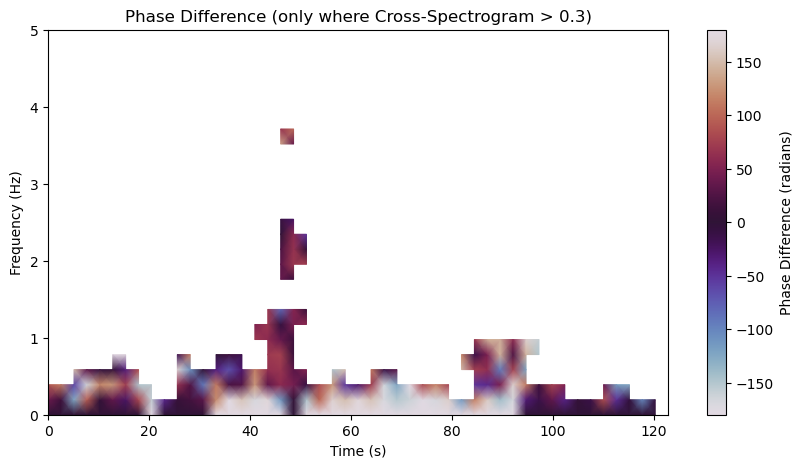

In [17]:
plotsignal.double_signals_time_cspd(signal1,signal2)